# 11.3. 네트워크 만들기

In [2]:
install.packages("igraph")

package 'igraph' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Dojun Park\AppData\Local\Temp\RtmpMZNg01\downloaded_packages


In [1]:
library(igraph)

Warning message:
"package 'igraph' was built under R version 3.6.3"
Attaching package: 'igraph'

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union



## make_star()

In [2]:
G.star <- make_star(6, mode='undirected', center=1)
G.star

IGRAPH 7e78bba U--- 6 5 -- Star
+ attr: name (g/c), mode (g/c), center (g/n)
+ edges from 7e78bba:
[1] 1--2 1--3 1--4 1--5 1--6

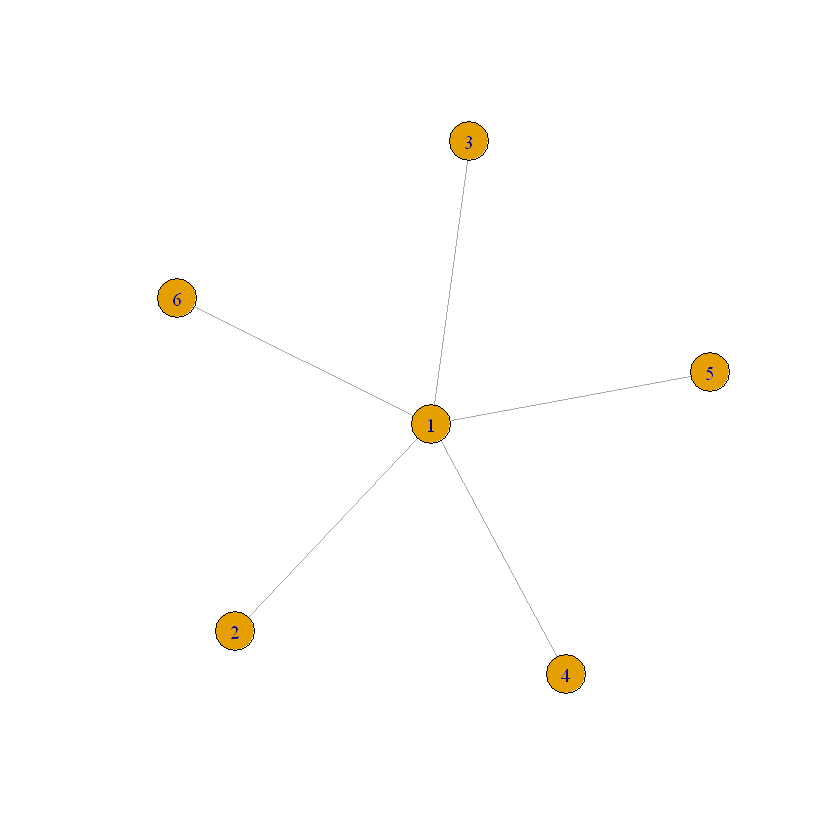

In [3]:
plot(G.star)

In [6]:
tkplot(G.star)

[1] 1

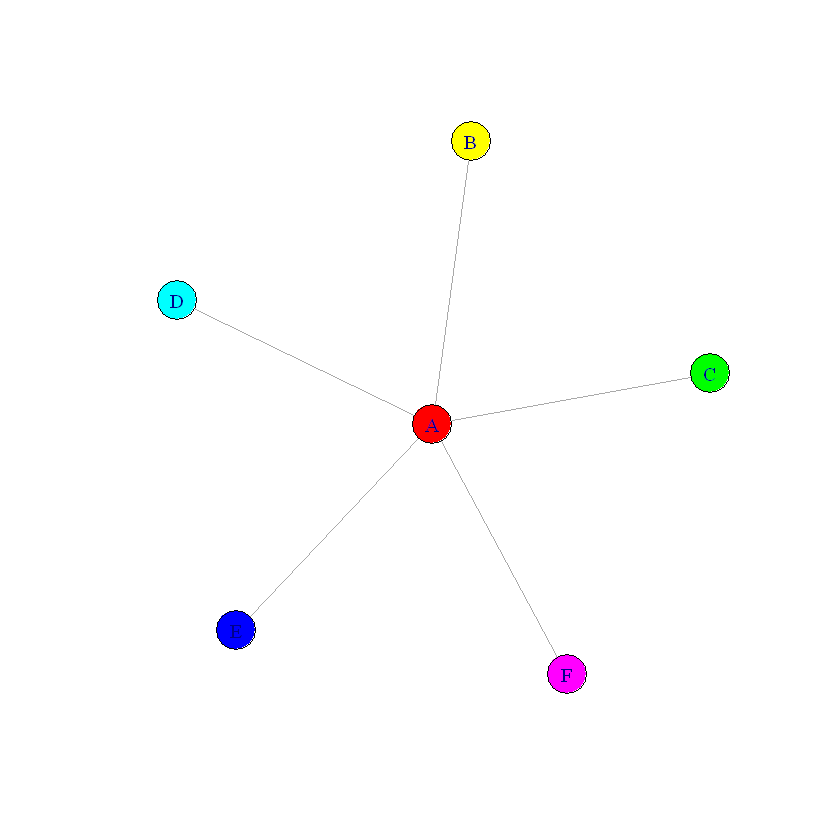

In [5]:
G.star <- make_star(6, mode='undirected', center=1) %>%
            set_vertex_attr("name", value=c('A', 'B', 'C', 'D', 'E', 'F'))
plot(G.star, vertex.color=rainbow(6), vertax.size=60)

## make_ring()

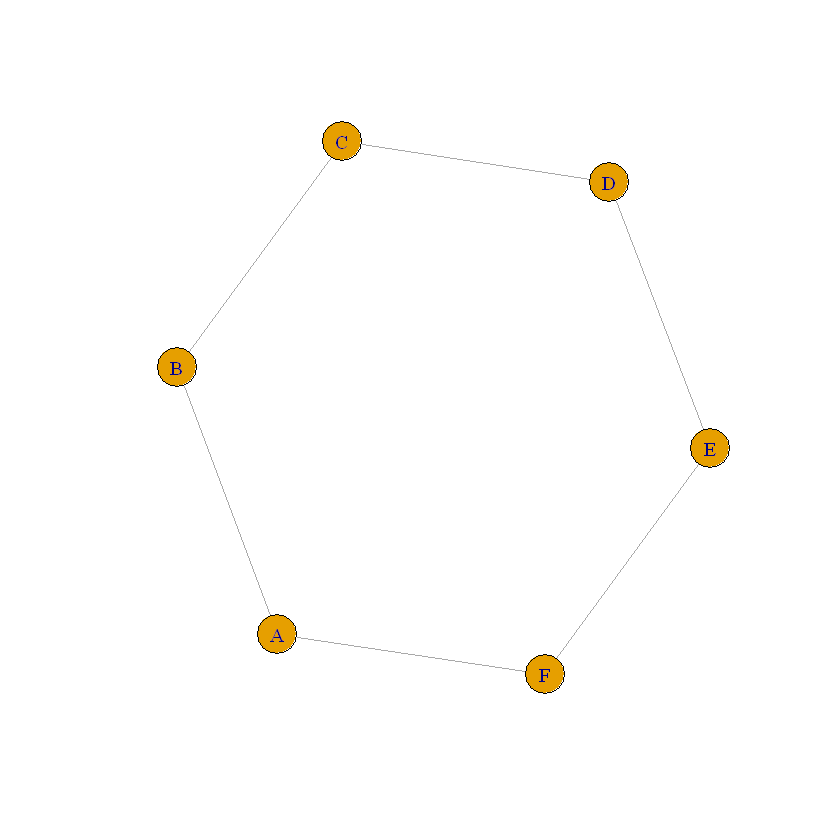

In [35]:
G.ring <- make_ring(6, directed=FALSE, circular=TRUE) %>%
            set_vertex_attr("name", value=c('A', 'B', 'C', 'D', 'E', 'F'))
plot(G.ring)

## make_graph()

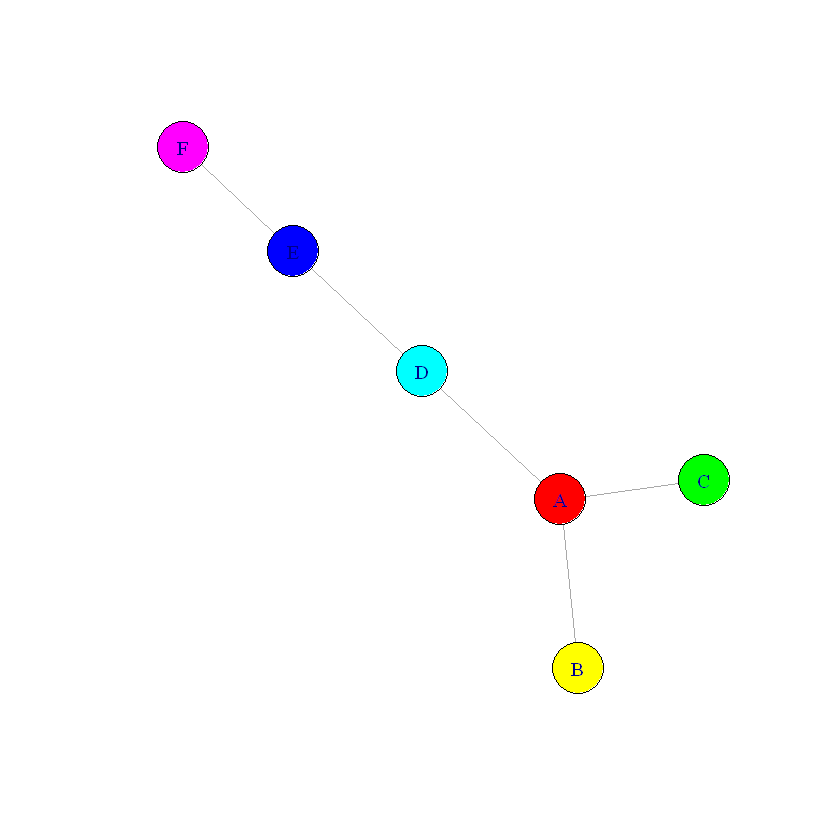

In [10]:
G.Y <- make_graph(edges=NULL, n=NULL, directed=FALSE)
G.Y <- G.Y + vertices('A', 'B', 'C', 'D', 'E', 'F')
G.Y <- G.Y + edges('A', 'B',
                  'A', 'C',
                  'A', 'D',
                  'D', 'E',
                  'E', 'F')
plot(G.Y, vertex.color=rainbow(6), vertex.size=20)

## 연결 정도의 중심성

In [11]:
degree(G.star, normalized=FALSE)

A B C D E F 
5 1 1 1 1 1

In [12]:
degree(G.star, normalized=TRUE)  # 정규화

A   B   C   D   E   F 
1.0 0.2 0.2 0.2 0.2 0.2

## 연결정도의 중심화

In [14]:
CD <- centralization.degree(G.star, normalized=FALSE)
CD

$res
[1] 5 1 1 1 1 1

$centralization
[1] 20

$theoretical_max
[1] 30

## 연결정도의 중심화 (정규화)

In [16]:
Tmax <- centralization.degree.tmax(G.star)
Tmax

[1] 20

In [17]:
CD$centralization / Tmax  # 정규화된 중심화

[1] 1

## 근접 중심성

In [19]:
closeness(G.star, normalized=FALSE)

A         B         C         D         E         F 
0.2000000 0.1111111 0.1111111 0.1111111 0.1111111 0.1111111

## 근접 중심화

In [21]:
CC <- centralization.closeness(G.star, normalized=FALSE)
CC

$res
[1] 1.0000000 0.5555556 0.5555556 0.5555556 0.5555556 0.5555556

$centralization
[1] 2.222222

$theoretical_max
[1] 2.222222

In [22]:
CC$centralization / (6-1)

[1] 0.4444444

In [23]:
CC$theoretical_max / (6-1)

[1] 0.4444444

In [25]:
1 / CC$centralization

[1] 0.45

## 중개 중심성

In [27]:
betweenness(G.star, normalized=FALSE)

A  B  C  D  E  F 
10  0  0  0  0  0

## 중개 중심화

In [29]:
CB <- centralization.betweenness(G.star, normalized=FALSE)
CB$centralization

[1] 50

In [30]:
CB$theoretical_max

[1] 50

In [31]:
CB$centralization / CB$theoretical_max

[1] 1

## 네트워크 밀도

In [33]:
graph.density(G.star)

[1] 0.3333333

In [32]:
graph.density(G.Y)

[1] 0.3333333

In [36]:
graph.density(G.ring)

[1] 0.4

## 최단경로와 최단거리

In [37]:
shortest.paths(G.Y)

,A,B,C,D,E,F
A,0,1,1,1,2,3
B,1,0,2,2,3,4
C,1,2,0,2,3,4
D,1,2,2,0,1,2
E,2,3,3,1,0,1
F,3,4,4,2,1,0


In [39]:
distances(G.Y, v='A', to='E')

,E
A,2


In [40]:
get.shortest.paths(G.Y, 'A', 'E')$vpath[[1]]  # 최단경로

+ 3/6 vertices, named, from b4dd6e2:
[1] A D E

In [42]:
average.path.length(G.Y)

[1] 2.133333